## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [255]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#LOADING DATA

In [256]:
boxofficemv = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
boxofficemv.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [257]:
boxofficemv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [258]:
boxofficemv.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## CLEANING DATA 

In [259]:
#Cleaning Data
boxofficemv.drop_duplicates()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [260]:
#removing NaN Values
boxofficemv.dropna(inplace=True)

boxofficemv

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [261]:
#studio against foreign_gross
#use group by then sort descending order

In [262]:
#chanaging foreign_gross datatype from object to float64
boxofficemv['foreign_gross'] = pd.to_numeric(boxofficemv['foreign_gross'].str.replace(',',''),errors='coerce')

In [263]:
boxofficemv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [264]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [265]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [266]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [267]:
#merge imdb.title.ratings with imdb.title.basics
movie_rating = imdb_title_basics.merge(imdb_title_ratings,on='tconst', how='inner')
movie_rating = movie_rating.sort_values(by='numvotes', ascending=False)
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 2387 to 59062
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [268]:
movie_rating.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
507,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
1091,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
15327,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
2831,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
2523,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [269]:
boxoffice_rating = boxofficemv.merge(movie_rating, left_on= 'title', right_on= 'original_title', how="inner")
boxoffice_rating.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [270]:
boxoffice_rating.isna().sum()

title               0
studio              0
domestic_gross      0
foreign_gross       0
year                0
tconst              0
primary_title       0
original_title      0
start_year          0
runtime_minutes    36
genres              4
averagerating       0
numvotes            0
dtype: int64

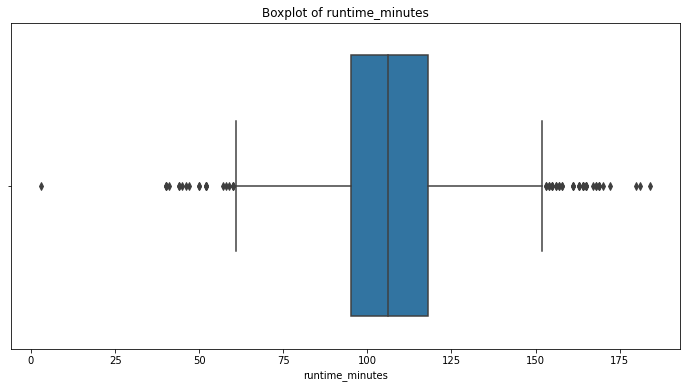

In [271]:
#visualizing the distribution of runtime_minutes in our combined dataframe
col_data = boxoffice_rating.runtime_minutes
plt.figure(figsize=(12,6))
sns.boxplot(x=col_data)
plt.title('Boxplot of runtime_minutes');

<AxesSubplot:>

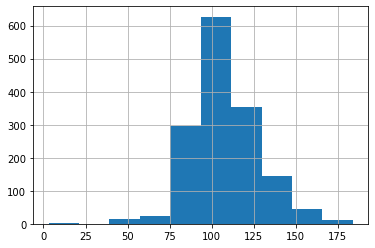

In [272]:
col_data.hist()

In [273]:
boxoffice_rating['runtime_minutes'].fillna(boxoffice_rating['runtime_minutes'].mean(), inplace=True)


In [274]:
boxoffice_rating.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             4
averagerating      0
numvotes           0
dtype: int64

In [275]:
boxoffice_rating.dropna(subset=['genres'], axis=0, inplace=True)

In [276]:
boxoffice_rating.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [277]:
drop_columns =['primary_title', 'tconst', 'original_title', 'start_year']
boxoffice_rating.drop(columns=drop_columns, axis=1, inplace=True)

In [278]:
boxoffice_rating.head(2)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066


In [279]:
boxoffice_rating['total_gross'] = boxoffice_rating['domestic_gross'] + boxoffice_rating['foreign_gross']
boxoffice_rating.head()

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,6.239000e+08


In [280]:
#The movie genres need to be split and exploded to allow for genre-specific analyses
boxoffice_rating.genres = boxoffice_rating.genres.str.split(',')
boxoffice_rating.head(5)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,"[Adventure, Drama, Fantasy]",5.0,211733,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690,6.239000e+08


In [281]:
#Exploding the genres
boxoffice_rating = boxoffice_rating.explode('genres')
boxoffice_rating.head()

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Adventure,8.3,682218,1.067000e+09
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Animation,8.3,682218,1.067000e+09
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Comedy,8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Action,8.8,1841066,8.283000e+08
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Adventure,8.8,1841066,8.283000e+08


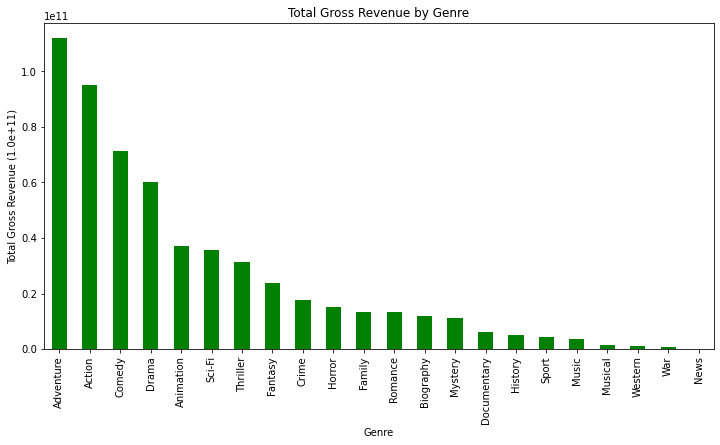

In [282]:
#Compare total_gross against genres, this is achieved by grouping data
gross_genres = boxoffice_rating.groupby('genres')['total_gross'].sum()

# Sort the results in descending order (highest total gross first)
sorted_data = gross_genres.sort_values(ascending=False)

# Create a figure and set the figure size
plt.figure(figsize=(12, 6))
sorted_data.plot(kind='bar', color="green")

# Set plot title, labels, and x-axis rotation
plt.title('Total Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue (1.0e+11)');

In [283]:
df=boxoffice_rating.groupby('genres')['averagerating'].mean()
df.head()

genres
Action       6.348259
Adventure    6.506667
Animation    6.608081
Biography    7.036486
Comedy       6.263894
Name: averagerating, dtype: float64

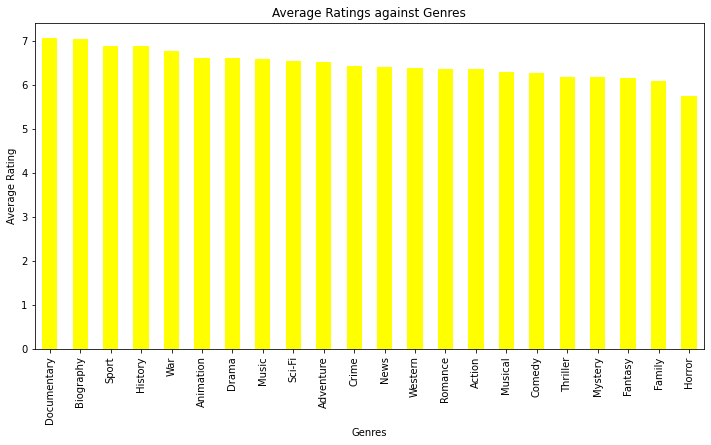

In [284]:
plt.figure(figsize=(12, 6))
ratings_genres = boxoffice_rating.groupby('genres')['averagerating'].mean()
sorted_data = ratings_genres.sort_values(ascending=False)
sorted_data.plot(kind='bar', color='yellow')
plt.title("Average Ratings against Genres")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Average Rating");

In [285]:
#drop one column 
#compare genre vs rating 

In [286]:
tnmovie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)
tnmovie_budgets 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [287]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [288]:
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

In [289]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


In [290]:
tnmovie_budgets['release_date'] = pd.to_datetime(tnmovie_budgets['release_date'])
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


In [291]:
tnmovie_budgets['profit'] = tnmovie_budgets['worldwide_gross'] - tnmovie_budgets['production_budget']
# Sort the DataFrame by the "profit" column in descending order
tnmovie_budgets = tnmovie_budgets.sort_values(by='profit', ascending=False)
tnmovie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09


<Figure size 2160x720 with 0 Axes>

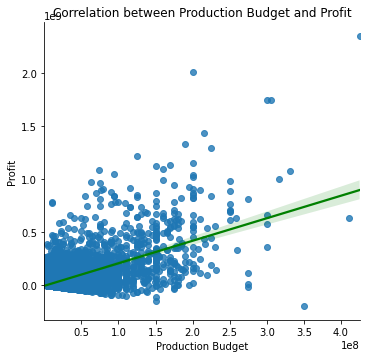

In [292]:
# Create a scatter plot with a regression line
plt.figure(figsize=(30, 10))
sns.lmplot(x='production_budget', y='profit', data=tnmovie_budgets, line_kws={'color': 'green'})

# Set labels and title
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.title("Correlation between Production Budget and Profit");

# Show the plot
plt.show()